In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.optimize import linear_sum_assignment


C:\Users\SSN\AppData\Local\Temp\ipykernel_13584\1632594296.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Importing Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

Load The data Sets

In [3]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_set['index'] = train_set.index
test_set['index'] = test_set.index

In [4]:
y_train = train_set["Activity"]
X_train = train_set.drop(["Activity","subject"], axis=1)
y_test = test_set["Activity"]
X_test = test_set.drop(["Activity","subject"], axis=1)

In [5]:
print("Column Names:", X_train.columns)
print("First few rows of X_train:")
print(X_train.head())

Column Names: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'index'],
      dtype='object', length=562)
First few rows of X_train:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174         

In [6]:
scaler = StandardScaler()
for col in X_train.columns:
    X_train[col]  = scaler.fit_transform(X_train[[col]])
for col in X_test.columns:
    X_test[col]  = scaler.fit_transform(X_test[[col]])
 

Standarize the Columns

In [7]:
class KMeans:
    def _init_(self, n_clusters, max_iters=300):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids):
                break
                
            self.centroids = new_centroids
                
        self.labels_ = self._assign_clusters(X)
    
    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                new_centroids[i] = self.centroids[i]  
        return new_centroids



In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train[['angle(X,gravityMean)', 'angle(tBodyAccMean,gravity)']].values)
y_pred_2 = kmeans.labels_


In [9]:
import matplotlib.pyplot as plt

X = X_train[['angle(X,gravityMean)', 'angle(tBodyAccMean,gravity)']].values


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)



KMeans(n_clusters=2)

In [11]:
kmeans.fit(X_train[['angle(X,gravityMean)', 'angle(tBodyAccMean,gravity)']].values)


KMeans(n_clusters=2)

In [12]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

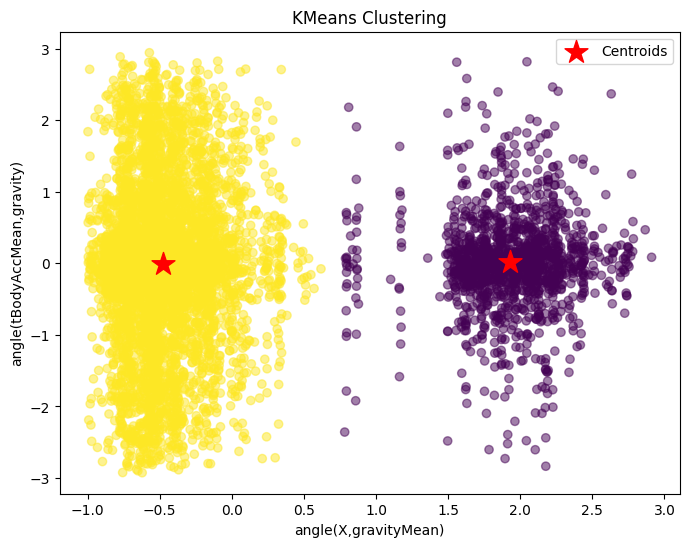

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=300, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('angle(X,gravityMean)')
plt.ylabel('angle(tBodyAccMean,gravity)')
plt.legend()
plt.show()



In [14]:
def two_labels(dataset):
    dataset_copied = dataset.copy()
    for label in range(len(dataset)):
        if dataset[label] == "SITTING":
            dataset[label] = 0
        elif dataset[label] == "LAYING":
            dataset[label] = 0
        elif dataset[label] == "STANDING":
            dataset[label] = 0
        elif dataset[label] == "WALKING_UPSTAIRS":
            dataset[label] = 1
        elif dataset[label] == "WALKING_DOWNSTAIRS":
            dataset[label] = 1
        elif dataset[label] == "WALKING":
            dataset[label] = 1
    return dataset_copied, dataset
y_train, y_train_2 = two_labels(y_train)
y_test, y_test_2 = two_labels(y_test)


In [15]:
conf_matrix = np.zeros((2,2))
for train_label, pred_label in zip(y_train_2.values, y_pred_2):
    conf_matrix[train_label][pred_label] +=1

row_ind, col_ind = linear_sum_assignment(1/conf_matrix)

interpret = dict(zip(col_ind, row_ind))
predicted_labels = np.array([interpret[label]
                            for label in y_pred_2])
print("Accuracy",np.mean(predicted_labels == y_train_2))

Accuracy 0.6451305767138193


In [16]:
class KMeans:
    def __init__(self, n_clusters, max_iters=300):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = self._assign_clusters(X)

    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                new_centroids[i] = self.centroids[i]
        return new_centroids

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train[['angle(X,gravityMean)', 'angle(tBodyAccMean,gravity)']].values)
y_pred_2 = kmeans.labels_


In [17]:
epsilon = 1e-9 

conf_matrix += epsilon * np.eye(conf_matrix.shape[0])
cost_matrix = 1 / conf_matrix
row_ind, col_ind = linear_sum_assignment(cost_matrix)
interpret = dict(zip(col_ind, row_ind))
predicted_labels = np.array([interpret[label] for label in y_pred_2])


In [18]:
accuracy = np.mean(predicted_labels == y_train_2)
print("Accuracy:", accuracy)

Accuracy: 0.6451305767138193
